<a href="https://colab.research.google.com/github/zehrabarann/Diagnosis-of-Cancer-Using-Blood-Microbiome-Data/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

import numpy as np
import pandas as pd
import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
!pip install xgboost

In [ ]:
np.random.seed(2019)
#tf.set_random_seed(1)

(355, 1837)
(355, 2)


prosrtate cancer    121
colon cancer        109
breast cancer       107
lung cancer          18
Name: disease_type, dtype: int64

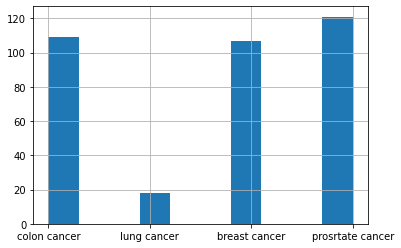

In [ ]:
data_df = pd.read_csv('your data csv')
labels_df = pd.read_csv('your labels csv',delimiter=",")
#data1 = np.array(data_df)
#data2 = np.array(labels_df)
target_labels = labels_df['disease_type']
print(data_df.shape)
print(labels_df.shape)
labels_df.head()
labels_df['disease_type'].hist()
labels_df['disease_type'].value_counts()

In [ ]:
labels_df.drop(columns=["Sample"], inplace=True) ##belirtilen etiketleri satır ve sütundan kaldır

In [ ]:
data_df.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
data = pd.concat([labels_df, data_df], axis=1, sort=False) ##eksen birleştirme(concat)

In [ ]:
data.dropna(inplace = True)  ##eksik değerleri kaldırır. True= işlemi yerinde yap ve none dönder!

In [ ]:
data

,disease_type,k__Viruses.f__Phycodnaviridae.g__Prasinovirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus,k__Viruses.f__Poxviridae.g__Parapoxvirus,k__Viruses.f__Papillomaviridae.g__Dyolambdapapillomavirus,k__Viruses.o__Mononegavirales.f__Bornaviridae.g__Bornavirus,k__Viruses.f__Bicaudaviridae.g__Bicaudavirus,k__Viruses.o__Picornavirales.f__Picornaviridae.g__Aquamavirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Scutavirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Mardivirus,k__Viruses.f__Baculoviridae.g__Deltabaculovirus,k__Viruses.f__Papillomaviridae.g__Taupapillomavirus,k__Viruses.o__Caudovirales.f__Myoviridae.g__I3likevirus,k__Viruses.f__Virgaviridae.g__Furovirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Proboscivirus,k__Viruses.o__Herpesvirales.f__Alloherpesviridae.g__Ictalurivirus,k__Viruses.f__Inoviridae.g__Inovirus,k__Viruses.f__Marseilleviridae.g__Marseillevirus,k__Viruses.o__Nidovirales.f__Coronaviridae.g__Gammacoronavirus,k__Viruses.f__Anelloviridae.g__Thetatorquevirus,k__Viruses.f__Ascoviridae.g__Ascovirus,k__Viruses.o__Tymovirales.f__Tymoviridae.g__Maculavirus,k__Viruses.o__Caudovirales.f__Myoviridae.g__Spo1virus,k__Viruses.f__Circoviridae.g__Gyrovirus,k__Viruses.o__Mononegavirales.f__Rhabdoviridae.g__Novirhabdovirus,k__Viruses.o__Picornavirales.f__Picornaviridae.g__Sicinivirus,k__Viruses.o__Picornavirales.f__Picornaviridae.g__Dicipivirus,k__Viruses.f__Poxviridae.g__Molluscipoxvirus,k__Viruses.o__Tymovirales.f__Tymoviridae.g__Tymovirus,k__Viruses.f__Arenaviridae.g__Mammarenavirus,k__Viruses.f__Flaviviridae.g__Hepacivirus,k__Viruses.f__Poxviridae.g__Alphaentomopoxvirus,k__Viruses.f__Anelloviridae.g__Gammatorquevirus,k__Viruses.g__Tenuivirus,k__Viruses.f__Hepeviridae.g__Piscihepevirus,k__Viruses.f__Virgaviridae.g__Pomovirus,k__Viruses.f__Caulimoviridae.g__Badnavirus,k__Viruses.f__Polydnaviridae.g__Ichnovirus,...,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Marinilabiliaceae.g__Anaerophaga,k__Bacteria.p__Cyanobacteria.c__Gloeobacteria.o__Gloeobacterales.g__Gloeobacter,k__Archaea.p__Euryarchaeota.c__Methanomicrobia.o__Methanosarcinales.f__Methanosarcinaceae.g__Methanosarcina,k__Bacteria.p__Actinobacteria.c__Thermoleophilia.o__Solirubrobacterales.f__Conexibacteraceae.g__Conexibacter,k__Bacteria.p__Tenericutes.c__Mollicutes.o__Mycoplasmatales.f__Mycoplasmataceae.g__Ureaplasma,k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Micrococcales.f__Microbacteriaceae.g__Microbacterium,k__Archaea.p__Euryarchaeota.c__Halobacteria.o__Haloferacales.f__Haloferacaceae.g__Halolamina,k__Bacteria.p__Proteobacteria.c__Epsilonproteobacteria.o__Campylobacterales.f__Campylobacteraceae.g__Sulfurospirillum,k__Bacteria.p__Spirochaetes.c__Spirochaetia.o__Spirochaetales.f__Spirochaetaceae.g__Spirochaeta,k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Micrococcales.f__Microbacteriaceae.g__Cryobacterium,k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Corynebacteriales.f__Gordoniaceae.g__Gordonia,k__Bacteria.p__Planctomycetes.c__Planctomycetia.o__Planctomycetales.f__Planctomycetaceae.g__Rubinisphaera,k__Bacteria.p__Actinobacteria.c__Actinobacteria.g__Thermobispora,k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Glycomycetales.f__Glycomycetaceae.g__Glycomyces,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Burkholderiales.f__Comamonadaceae.g__Ottowia,k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhizobiales.f__Xanthobacteraceae.g__Ancylobacter,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Faecalibacterium,k__Bacteria.p__Firmicutes.c__Bacilli.o__Bacillales.f__Bacillaceae.g__Paucisalibacillus,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Burkholderiales.f__Burkholderiaceae.g__Polynucleobacter,k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhodospirillales.f__Rhodospirillaceae.g__Caenispirillum,k__Archaea.p_

In [ ]:
X = data.drop(['disease_type'], axis=1)

In [ ]:
y = data['disease_type']

In [ ]:
X_encoded = pd.get_dummies(X, prefix_sep="_")
y_encoded = LabelEncoder().fit_transform(y)

In [ ]:
X_scaled = StandardScaler().fit_transform(X_encoded)

In [ ]:
X_scaled

array([[-0.69211395, -0.34442468, -0.91359726, ..., -0.21960953,
        -0.07527099, -0.06342219],
       [-0.69211395, -0.34442468, -0.87667058, ..., -0.21960953,
        -0.07527099, -0.06342219],
       [-0.25954273, -0.34442468,  3.4252876 , ..., -0.21960953,
        -0.07527099, -0.06342219],
       ...,
       [-0.25954273, -0.34442468, -0.61818382, ..., -0.21960953,
        -0.07527099, -0.06342219],
       [-0.69211395, -0.34442468,  0.04649641, ..., -0.21960953,
        -0.07527099, -0.06342219],
       [ 0.6055997 , -0.34442468, -0.17506367, ..., -0.21960953,
        -0.07527099, -0.06342219]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size = 0.3, random_state = 150)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_test

array([[-0.69211395, -0.34442468,  1.20968682, ..., -0.21960953,
        -0.07527099, -0.06342219],
       [-0.25954273, -0.34442468, -0.34123373, ..., -0.21960953,
        -0.07527099, -0.06342219],
       [-0.69211395, -0.34442468, -0.43355042, ..., -0.21960953,
        -0.07527099, -0.06342219],
       ...,
       [ 0.6055997 , -0.34442468, -0.19352701, ..., -0.21960953,
        -0.07527099, -0.06342219],
       [ 1.47074214,  1.18395983,  1.96668375, ..., -0.21960953,
        -0.07527099, -0.06342219],
       [-0.25954273, -0.34442468, -0.43355042, ..., -0.21960953,
        -0.07527099, -0.06342219]])

In [ ]:
model = RandomForestClassifier(n_estimators=700).fit(X_train,y_train)
preds = model.predict(X_test)

print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[28  1  0  2]
 [ 0 32  0  0]
 [ 0  0  7  0]
 [ 0  0  0 37]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.97      1.00      0.98        32
           2       1.00      1.00      1.00         7
           3       0.95      1.00      0.97        37

    accuracy                           0.97       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.97      0.97      0.97       107



In [ ]:
preds

array([2, 0, 0, 0, 3, 0, 3, 0, 2, 1, 3, 3, 3, 0, 3, 3, 1, 0, 3, 3, 1, 3,
       3, 1, 0, 3, 0, 0, 3, 3, 3, 3, 1, 0, 1, 2, 3, 0, 2, 1, 3, 3, 0, 0,
       1, 0, 1, 3, 1, 3, 1, 1, 3, 3, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 3,
       0, 1, 0, 0, 3, 1, 3, 1, 3, 3, 1, 1, 3, 0, 1, 3, 3, 0, 2, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3])

In [ ]:
import matplotlib.pylab as plt

In [ ]:
feature_imp = pd.Series(model.feature_importances_, index = X_encoded.columns)

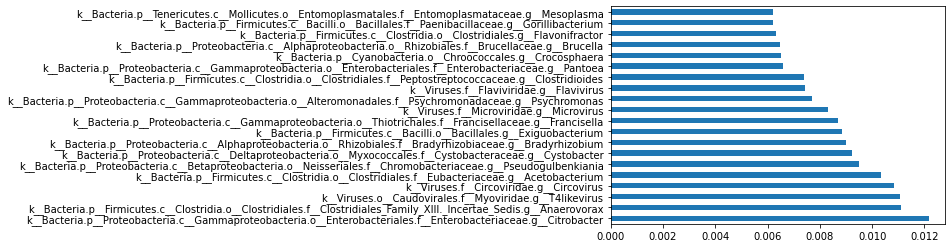

In [ ]:
feature_imp.nlargest(20).plot(kind="barh") ##modele en çok etki eden kolonlar

In [ ]:
best_feat = feature_imp.nlargest(10).index

In [ ]:
best_feat

Index(['k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacteriales.f__Enterobacteriaceae.g__Citrobacter',
       'k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiales_Family_XIII._Incertae_Sedis.g__Anaerovorax',
       'k__Viruses.o__Caudovirales.f__Myoviridae.g__T4likevirus',
       'k__Viruses.f__Circoviridae.g__Circovirus',
       'k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Eubacteriaceae.g__Acetobacterium',
       'k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Neisseriales.f__Chromobacteriaceae.g__Pseudogulbenkiania',
       'k__Bacteria.p__Proteobacteria.c__Deltaproteobacteria.o__Myxococcales.f__Cystobacteraceae.g__Cystobacter',
       'k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhizobiales.f__Bradyrhizobiaceae.g__Bradyrhizobium',
       'k__Bacteria.p__Firmicutes.c__Bacilli.o__Bacillales.g__Exiguobacterium',
       'k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Thiotrichales.f__Francisellaceae.g_

In [ ]:
X_reduced = X_encoded[best_feat]

In [ ]:
X_reduced.head(10)

,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacteriales.f__Enterobacteriaceae.g__Citrobacter,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiales_Family_XIII._Incertae_Sedis.g__Anaerovorax,k__Viruses.o__Caudovirales.f__Myoviridae.g__T4likevirus,k__Viruses.f__Circoviridae.g__Circovirus,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Eubacteriaceae.g__Acetobacterium,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Neisseriales.f__Chromobacteriaceae.g__Pseudogulbenkiania,k__Bacteria.p__Proteobacteria.c__Deltaproteobacteria.o__Myxococcales.f__Cystobacteraceae.g__Cystobacter,k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhizobiales.f__Bradyrhizobiaceae.g__Bradyrhizobium,k__Bacteria.p__Firmicutes.c__Bacilli.o__Bacillales.g__Exiguobacterium,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Thiotrichales.f__Francisellaceae.g__Francisella
0,176,3,0,2,7,453,11,823,239,90
1,185,0,0,0,2,3,1,158,199,80
2,4401,25,0,1534,79,1821,40,6309,3925,1034
3,488,2,0,0,3,5,0,517,480,202
4,1156,13,0,402,63,121,68,8481,1619,341
5,225,1,0,0,0,689,0,637,222,94
6,263,1,0,0,0,58,0,92,210,76
7,2383,16,0,616,34,1041,12,3561,1867,587
8,818,2,0,598,41,2368,46,23667,585,192
9,335,1,0,0,1,20,2,181,264,122


In [ ]:
Xr_scaled = StandardScaler().fit_transform(X_reduced)

In [ ]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scaled, y_encoded, test_size = 0.3, random_state = 150)

In [ ]:
rmodel = RandomForestClassifier(n_estimators=700).fit(Xr_train,yr_train)
rpreds = rmodel.predict(Xr_test)





In [ ]:
print(confusion_matrix(y_test,rpreds))
print(classification_report(y_test,rpreds))

[[27  1  0  3]
 [ 0 32  0  0]
 [ 0  0  6  1]
 [ 0  0  0 37]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        31
           1       0.97      1.00      0.98        32
           2       1.00      0.86      0.92         7
           3       0.90      1.00      0.95        37

    accuracy                           0.95       107
   macro avg       0.97      0.93      0.95       107
weighted avg       0.96      0.95      0.95       107



In [ ]:
print(confusion_matrix(y_test,rpreds))
print(classification_report(y_test,rpreds))

[[27  1  0  3]
 [ 0 32  0  0]
 [ 0  0  6  1]
 [ 0  0  0 37]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        31
           1       0.97      1.00      0.98        32
           2       1.00      0.86      0.92         7
           3       0.90      1.00      0.95        37

    accuracy                           0.95       107
   macro avg       0.97      0.93      0.95       107
weighted avg       0.96      0.95      0.95       107



Normalde confusion matris 2x2 lik bir matris. Ancak 4 sınıf olduğu için Pythonda 1x4lük olarak yazılmış. Gerçek ve tahmini değerler incelenerek TP, FP, FN, TN değerlerinin yerleri tespit edildi. Sonrasında Specificity ve Sensitivity değerleri hesaplandı. 4 sınıf için ayrı ayrı hesaplanması istenildiği için 4 tane Specificity ve 4 tane Sensitivity değeri bulunur.

In [ ]:
#[[27  1  0  3]  TP, FP, FN, TN  0 - class
 #[ 0 32  0  0]  TN, TP, FP, FN  1 - class
 #[ 0  0  6  1]  FN, TN, TP, FP  2 - class
 #[ 0  0  0 37]] FP, FN, TN, TP  3 - class

 # [27  1]  [ 32 0]   [ 6  1    [ 37 0   
 # [0  3]   [ 0  0]     0  0]     0  0]

In [ ]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(Xr_scaled, y_encoded)
predictions = gbm.predict(Xr_test)


In [ ]:
predictions

array([2, 0, 0, 0, 3, 0, 3, 0, 2, 1, 3, 3, 3, 0, 3, 3, 1, 0, 3, 3, 1, 3,
       3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 1, 0, 1, 2, 3, 0, 2, 1, 3, 3, 0, 0,
       1, 0, 1, 3, 1, 3, 1, 1, 0, 3, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 3,
       0, 1, 0, 0, 3, 1, 0, 1, 3, 3, 1, 1, 3, 0, 1, 3, 3, 0, 2, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3])

In [ ]:
y_test

array([2, 0, 0, 0, 3, 0, 3, 0, 2, 1, 3, 3, 3, 0, 3, 3, 1, 0, 3, 3, 1, 3,
       3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 1, 0, 1, 2, 3, 0, 2, 1, 3, 3, 0, 0,
       1, 0, 1, 3, 1, 3, 1, 1, 0, 3, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 3,
       0, 1, 0, 0, 3, 1, 0, 1, 3, 3, 1, 1, 3, 0, 1, 3, 3, 0, 2, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3])

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[31  0  0  0]
 [ 0 32  0  0]
 [ 0  0  7  0]
 [ 0  0  0 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        37

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [ ]:
cm = confusion_matrix(y_test,predictions) ##confusion matrix = öngörülen ve gerçek değerlerin 4 farklı kombinasyonunu içeren tablo

Specificity'lerin nan gelmesinin sebebi TN ve FP değerlerinin 0 olmasından kaynaklanmaktadır. Mailde belirtildiği gibi asıl sınıf haricindeki diğer sınıfların hepsi negatif sayılsa da aynı şekilde nan gelmektedir

In [ ]:
specificity1 = cm[0,3]/(cm[0,3]+cm[0,1])    ##cm[0,3]/(cm[0,3]+cm[0,1]+cm[0,2]) hesaplama içerisinde tüm negatifler alınsada sonuç aynı çıktı
print('Specificity1 : ', specificity1)           ##SP = TN/(TN+FP) = TN/N    ikisi de aynıdır. 

Specificity1 :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


In [ ]:
specificity2 = cm[1,0]/(cm[1,0]+cm[1,2])
print('Specificity2 : ', specificity2)

Specificity2 :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


In [ ]:
specificity3 = cm[2,1]/(cm[2,1]+cm[2,3])
print('Specificity3 : ', specificity3)

Specificity3 :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


In [ ]:
specificity4 = cm[3,2]/(cm[3,2]+cm[3,0])
print('Specificity4 : ', specificity4)

Specificity4 :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


Sensitivity değeri 4 sınıf için de 1 olarak gelir. Çünkü TP haricindeki bütün durumlar 0dır

In [ ]:
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,2])
print('Sensitivity1 : ', sensitivity1 )

Sensitivity1 :  1.0


In [ ]:
sensitivity2 = cm[1,1]/(cm[1,1]+cm[1,3])
print('Sensitivity2 : ', sensitivity2 )

Sensitivity2 :  1.0


In [ ]:
sensitivity3 = cm[2,2]/(cm[2,2]+cm[2,0])
print('Sensitivity3 : ', sensitivity3 )

Sensitivity3 :  1.0


In [ ]:
sensitivity4 = cm[3,3]/(cm[3,3]+cm[3,1])
print('Sensitivity4 : ', sensitivity4)

Sensitivity4 :  1.0
